<a href="https://colab.research.google.com/github/denisecammarota/data-science-course/blob/main/StatisticsRClasses/ExploratoryDataAnalysis_ClassNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of the Iris Dataset - Class Notes

## First we will load the data

This is the iris dataset, which I already worked with in Python doing some Machine Learning.

In [48]:
library(datasets)
data(iris)

## Preliminary Analysis functions

This functions will allow us to get a feel for how variables behave, which are their names, their ranges, types and lengths. Several were presented here in class, but I don't think there's a huge need to use all of them really. 

First, we will use the function str, which tells us this is a dataframe, that has 150 observations correspondint to 5 different variables: sepal length, sepal width, petal width, petal length and species of flower. The first four characteristics are numeric and have several possible values. On the contrary, the last one is a string with 3 possible values (setosa, vesicolor and virginica). 

In [49]:
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Other functions include:
- class, which tells us that this iris is a dataframe, as we already knew

In [50]:
class(iris)

[1] "data.frame"

- nrow and ncol, which provide us with the amounts of rows and columns respectively

In [51]:
nrow(iris)

[1] 150

In [52]:
ncol(iris)

[1] 5

- names of the columns, the same ones we read before from the str function

In [53]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

- Also, for each characteristic, it is important to compute at the same time: name, range and length. We can do this using the following code, that uses function range and length

In [54]:
for(i in c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width')){
  print(paste(range(iris[,i]),length(iris[,i])))
}

[1] "4.3 150" "7.9 150"
[1] "2 150"   "4.4 150"
[1] "1 150"   "6.9 150"
[1] "0.1 150" "2.5 150"


- As well the functions nlevels and levels provide us with the number and the values that are possible for each variable. Let's try this in the species case, for example. Firstly, as we can see, there are 3 possible species of flowers

In [55]:
nlevels(iris[,'Species']) 

[1] 3

And this are the three possible values: setosa, virginica and versicolor

In [56]:
levels(iris[,'Species'])

[1] "setosa"     "versicolor" "virginica"

- Another very useful function is table, which allows us to sum up this information like this, and tells us that there are 50 input data for each flower

In [57]:
table(iris[,'Species'])


    setosa versicolor  virginica 
        50         50         50 

We can do the same for numeric values using either of two following forms. Both shield the same result, and tells us that value 4.3 is spotted once, 4.4 three times and so on

In [58]:
table(iris[,'Sepal.Length'])


4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.2 
  1   3   1   4   2   5   6  10   9   4   1   6   7   6   8   7   3   6   6   4 
6.3 6.4 6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.6 7.7 7.9 
  9   7   5   2   8   3   4   1   1   3   1   1   1   4   1 

In [59]:
table(iris$'Sepal.Length')


4.3 4.4 4.5 4.6 4.7 4.8 4.9   5 5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9   6 6.1 6.2 
  1   3   1   4   2   5   6  10   9   4   1   6   7   6   8   7   3   6   6   4 
6.3 6.4 6.5 6.6 6.7 6.8 6.9   7 7.1 7.2 7.3 7.4 7.6 7.7 7.9 
  9   7   5   2   8   3   4   1   1   3   1   1   1   4   1 

- Other two very useful functions are head and tail, which are reminiscent of Python's pandas respective functions 

In [60]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [61]:
tail(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


# Statistical Data Analysis and their Plots

### Summary function
One of the most useful functions that can provide us with an statistical summary is summary, whose result applied to the iris dataset is the following. It is remarkable that it provides results even for categorical data.  

In [62]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### Plots
Plots are another extremely useful tool when doing a preliminary data analysis. Here we will see the principal plots that are usually done in R at this stage of data exploration. 

#### Histograms 

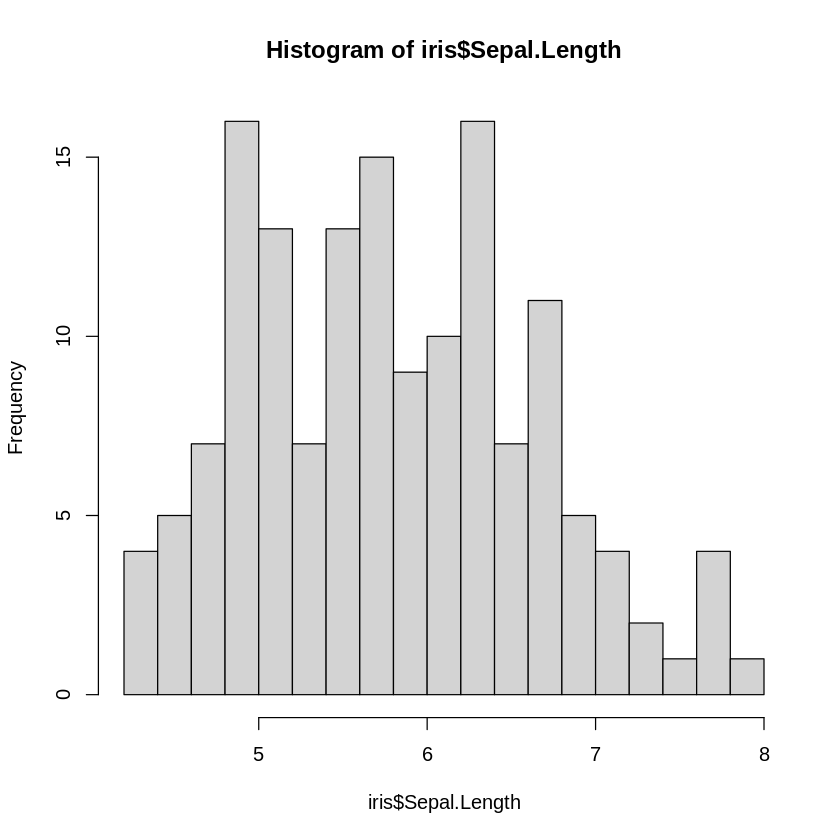

In [73]:
hist(iris$Sepal.Length,breaks=20)

#### QQPlots 
These plots allow us to detect normal distributions.In the case that we detect a line in the plot, a variable is more likely to have a normal distribution. Let's do this for the Sepal.Length variable. In this case, it is very similar to a line.

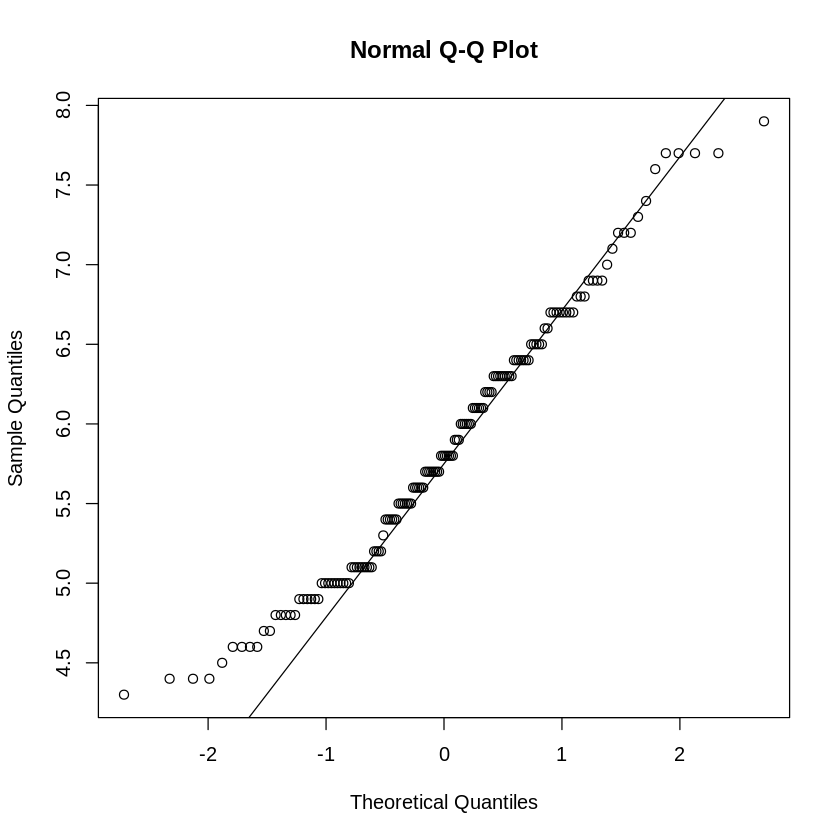

In [95]:
qqnorm(iris$Sepal.Length)
qqline(iris$Sepal.Length) #line at 45 degrees, to assess linearity of this relationship 

#### Box Plot
This type of plot is extremely useful to gauge the distribution of variables, because they allow us to see the mean, the median, the standard deviation, the quantiles, and the extreme cases as well. We will construct this plot as a funcion of the different species of flowers. 

In this case, the interesting conclusion from this graph is that petal length for the different species do not overlap much between virginica, setosa and versicolor flowers. Therefore, petal length is an interesting variable to develop a predictive model with. And that's what this type of data analysis for: to not fit our models blindly and have no idea why things work/don't work. 

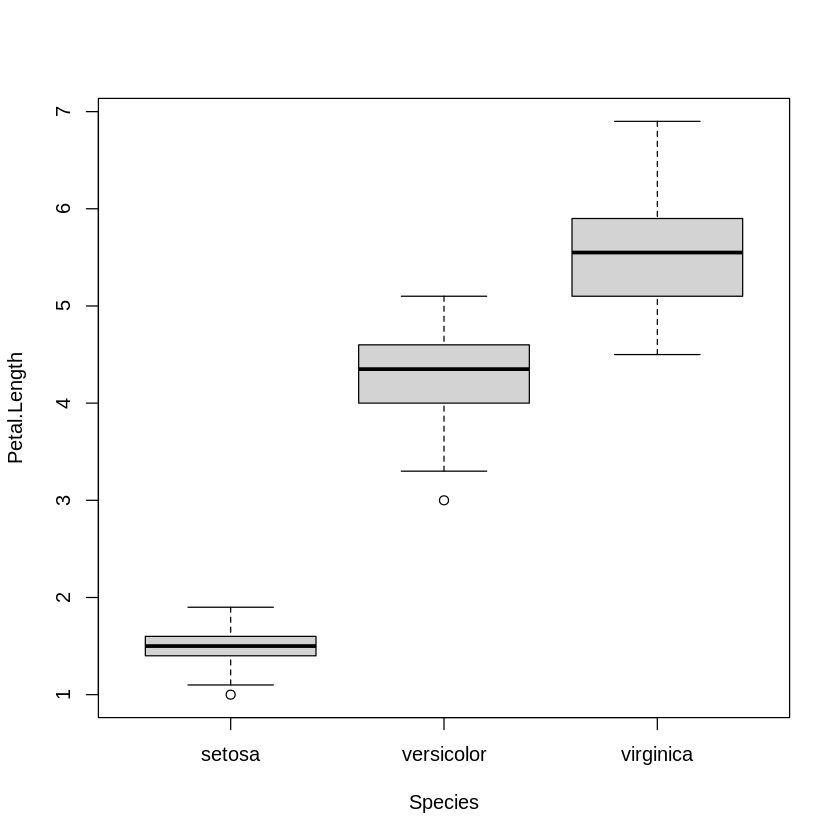

In [76]:
boxplot(Petal.Length ~ Species,data=iris,ylab='Petal.Length',varwidth = TRUE)

#### Scatter Plot

This type of plots allow us to detect relationships between variables, and are the typical x/y plots that are so common in math and physics. Let's see what this can tell us about the relationship between Sepal and Petal Length. 

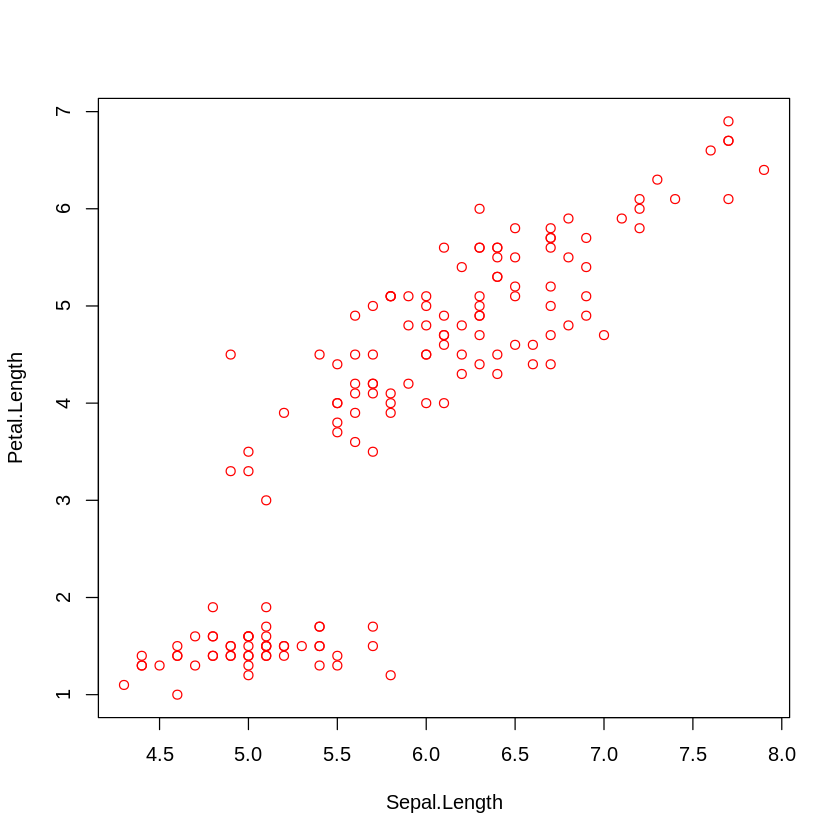

In [80]:
plot(Petal.Length~Sepal.Length, data=iris, col='red')

We could want to do this for all pairs of numeric variables like these. Fortunately, we don't have to repeat a similar color again and again. For that purpose, we have the pairs function. 

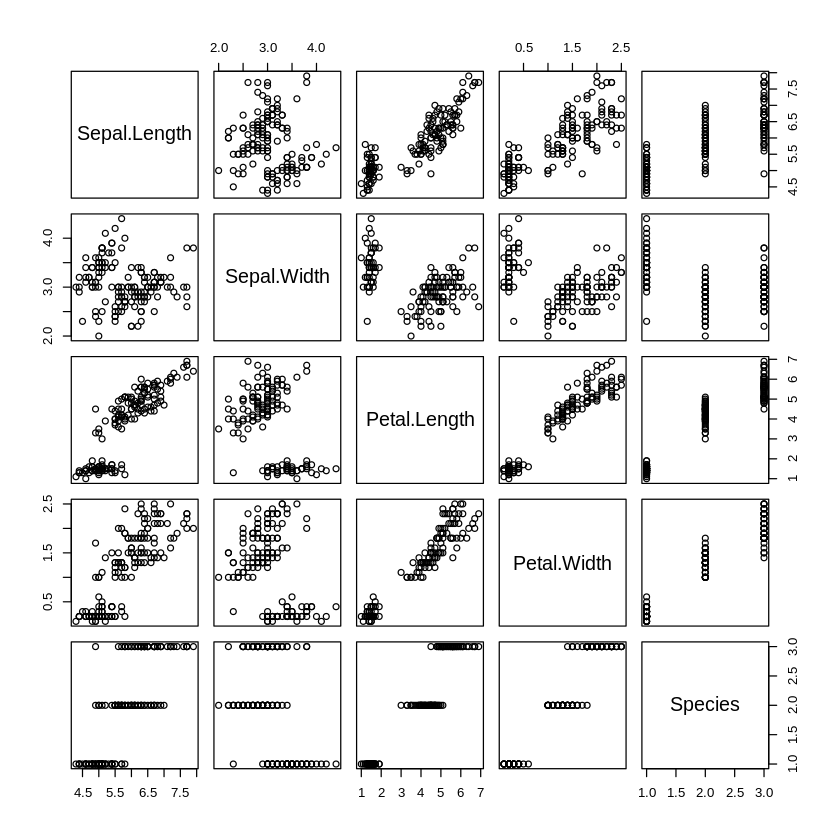

In [81]:
pairs(iris)

#### Barplot

The plot function makes a barplot if it detects a variable as categorical

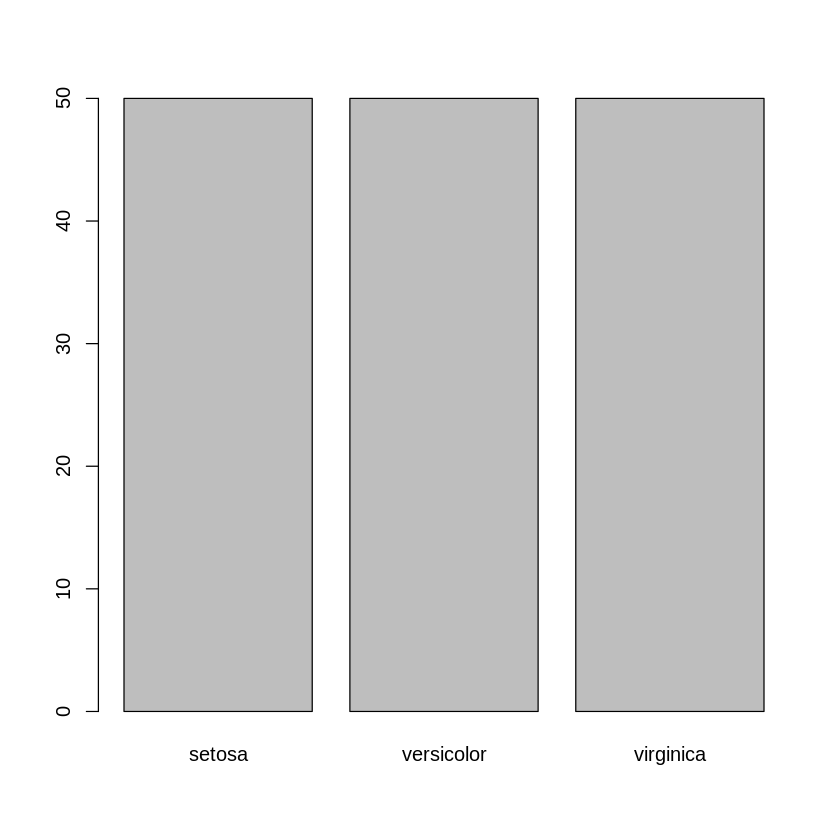

In [88]:
plot(iris$Species)

#### Pie Chart

Making a pie chart is pretty straightforward using the summary function on our data like in the following plot. 

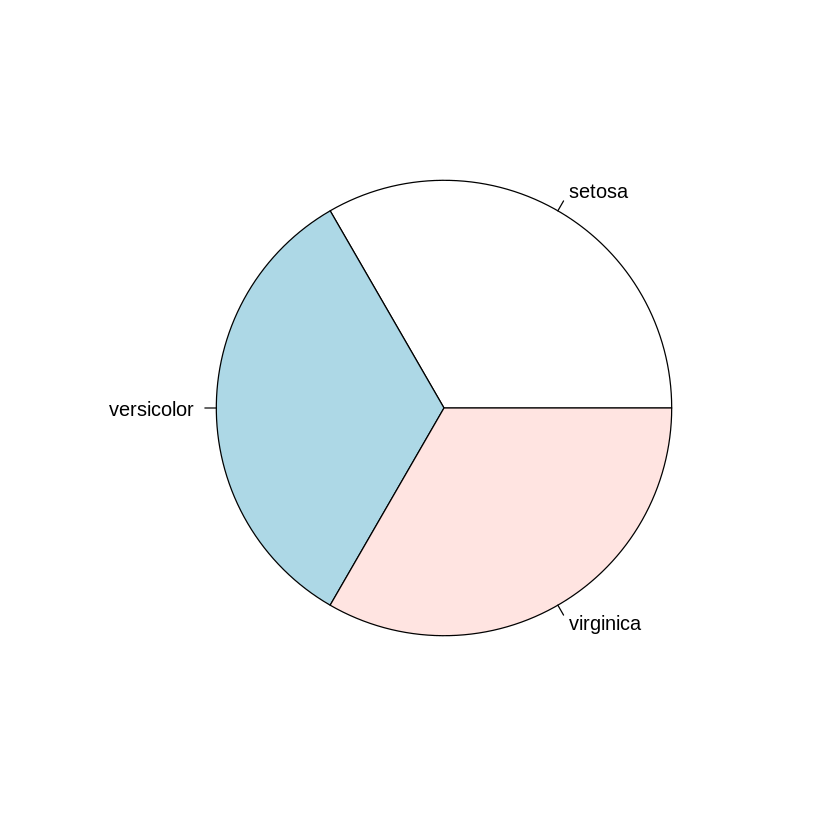

In [91]:
pie(summary(iris$Species))

#### Heatmap
A heatmap is used when there are two categorical values who will be the vertical and horizontal axis of a matrix of values. Let's imagine if we have a registry of sales organized by shops and months. 

In [92]:
months <- seq(1,12) #12 months
shops <- seq(1,15) #15 shops
m_sales <- matrix(sample(1:30,12*15,replace=TRUE),nrow=12,ncol=15) #matrix filled with numbers between 1 and 30

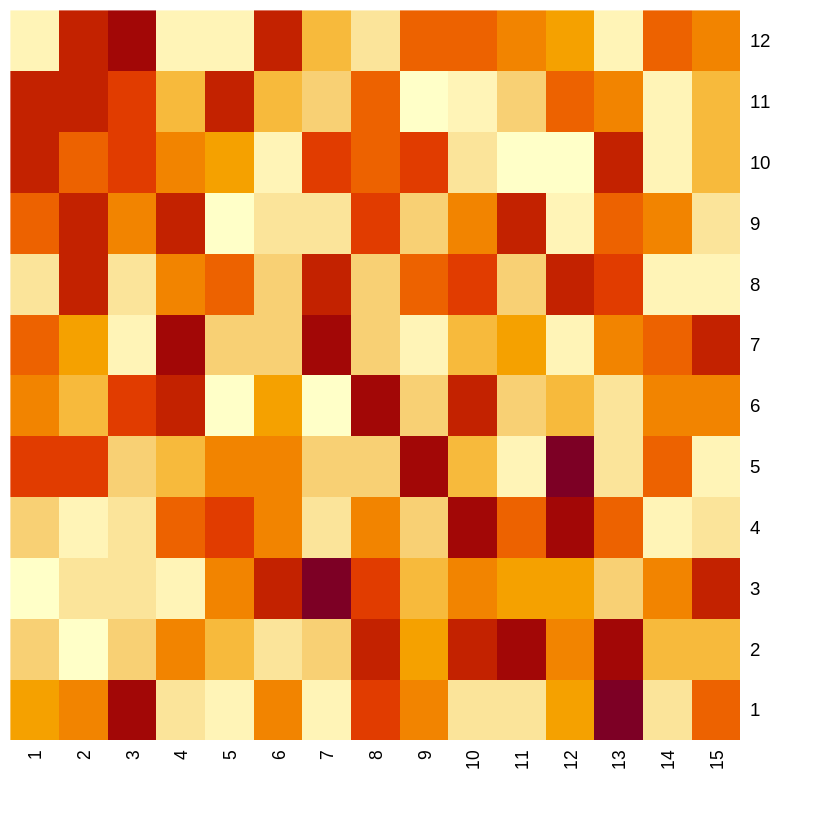

In [94]:
heatmap(m_sales,Rowv=NA,Colv=NA)